In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import quandl
import os
import matplotlib.pyplot as plt
from scipy.optimize import fmin

import numpy.matlib
from TAU_P import TAU_P
from EFK_SRTSM import EFK_SRTSM
from matplotlib.backends.backend_pdf import PdfPages
import datetime as dt

from lower_bound_sensitivity_v2 import *
from plot_shadow_rates import *

ModuleNotFoundError: No module named 'EFK_SRTSM'

In [16]:
forward_df = pd.read_excel("UK_fwd_monthly_cleaned.xlsx")
forward_df.set_index("Date", inplace=True)
forward_df.index = [x.strftime("%Y%m") for x in forward_df.index]
forward_df = forward_df[forward_df.index>="200601"]

In [18]:
maturities = [1,2,3,4,5,6,7,10,15,20,25]
forward_df = forward_df.loc[:,maturities].copy()

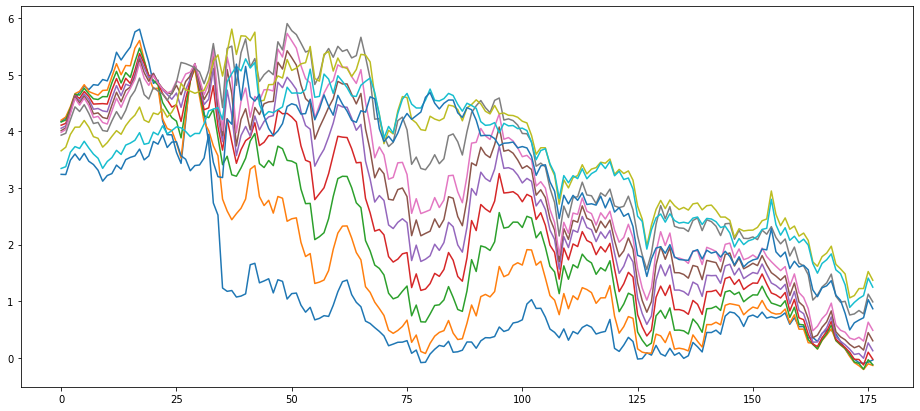

In [20]:
plt.figure(figsize=(16,7))
plt.plot(forward_df.values)

In [21]:
LB = -0.1
split_date = "202010"
parameters = pd.read_csv("parameters_initial.csv", header=None).values
startv = parameters
parameters_df = calibrate_parameters(forward_df, maturities, LB, split_date, print_log=True)

Optimization terminated successfully.
         Current function value: -641.718615
         Iterations: 9146
         Function evaluations: 11510
======== shadow rate term structure model========

lower_bound= -0.1
The log likelihood value is: 641.718615451892
1154


In [28]:
parameters = parameters_df.values
nparam = np.append(parameters, -0.1)

In [25]:
datelist = [dt.datetime.strptime(x, '%Y%m') for x in forward_df.index]

In [34]:
SR = EFK_SRTSM(nparam, np.array(maturities)*12, forward_df.values, 2)[0]

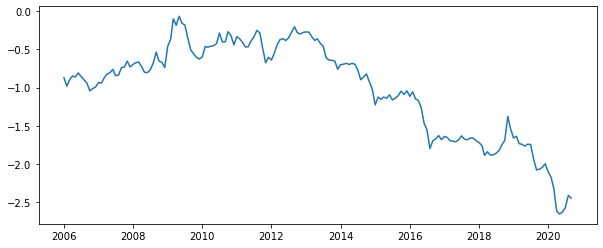

In [36]:
plt.figure(figsize=(10,4))

plt.plot(datelist, SR)